# Sentiment Analysis with VADER
Since our text data is not labeled, and this project was created before the advent of LLMs, we will use vader_sentiment to perform the sentiment analysis.

vader_sentiment_sentiment_sentiment_sentiment (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained sentiment analysis model designed for analyzing sentiments in social media texts. It assigns sentiment scores to words and combines them to calculate the overall sentiment of a text, taking into account context, intensity, and grammatical structure.

But as we saw previously Wallstretbets has its own slang, so I added a few words and change some others. To see how I updated the library please go to vader_sentiment/vader_sentiment_mod.r. For sentiment estimation please refer to src/sentiment.r. 

Extracting the sentiment is pretty straightforward, I just calculated sentiment for each post and mapped it to all the stocks mentioned inside the post. This is because most of the posts don't try to articulate a reasoning, like in the DD section, but they usually express a simple opinion like *"TO THE MOON GME BB NOK"*, to share a significant loss or gain *"YOLOED my life savings on AMC"*, or just to make some memes.  

In [2]:
library(gridExtra);
library(tidyverse);

In [11]:
# Open ticker labeled reddit posts with sentiment feature 
vader_sentiment <- read.csv(file = "../data/vader_sentiment.csv",
                        header = TRUE,
                        sep = ",",
                        dec = ".")

vader_sentiment$i <- rep(1, nrow(vader_sentiment))
plot_df_b <- vader_sentiment %>%
group_by(stock_mention) %>%
    summarise(
        sent.avg = mean(sentiment),
        sent.var = var(sentiment),
        n_mentions = sum(i)
    ) %>%
    as.data.frame()

plot_df_a <- vader_sentiment %>% select(-c(stock_mention)) %>% distinct()

We can see that the average sentiment score of each day is positive for all the major tickers and that all of them tend to have a comparable variances. This is because when a stock on Wallstreetbets is heavily mentioned, it is most likely that the average sentiment score will be positive, as the most common strategy is long, and that the person writing the post will try to push others to buy that stock.

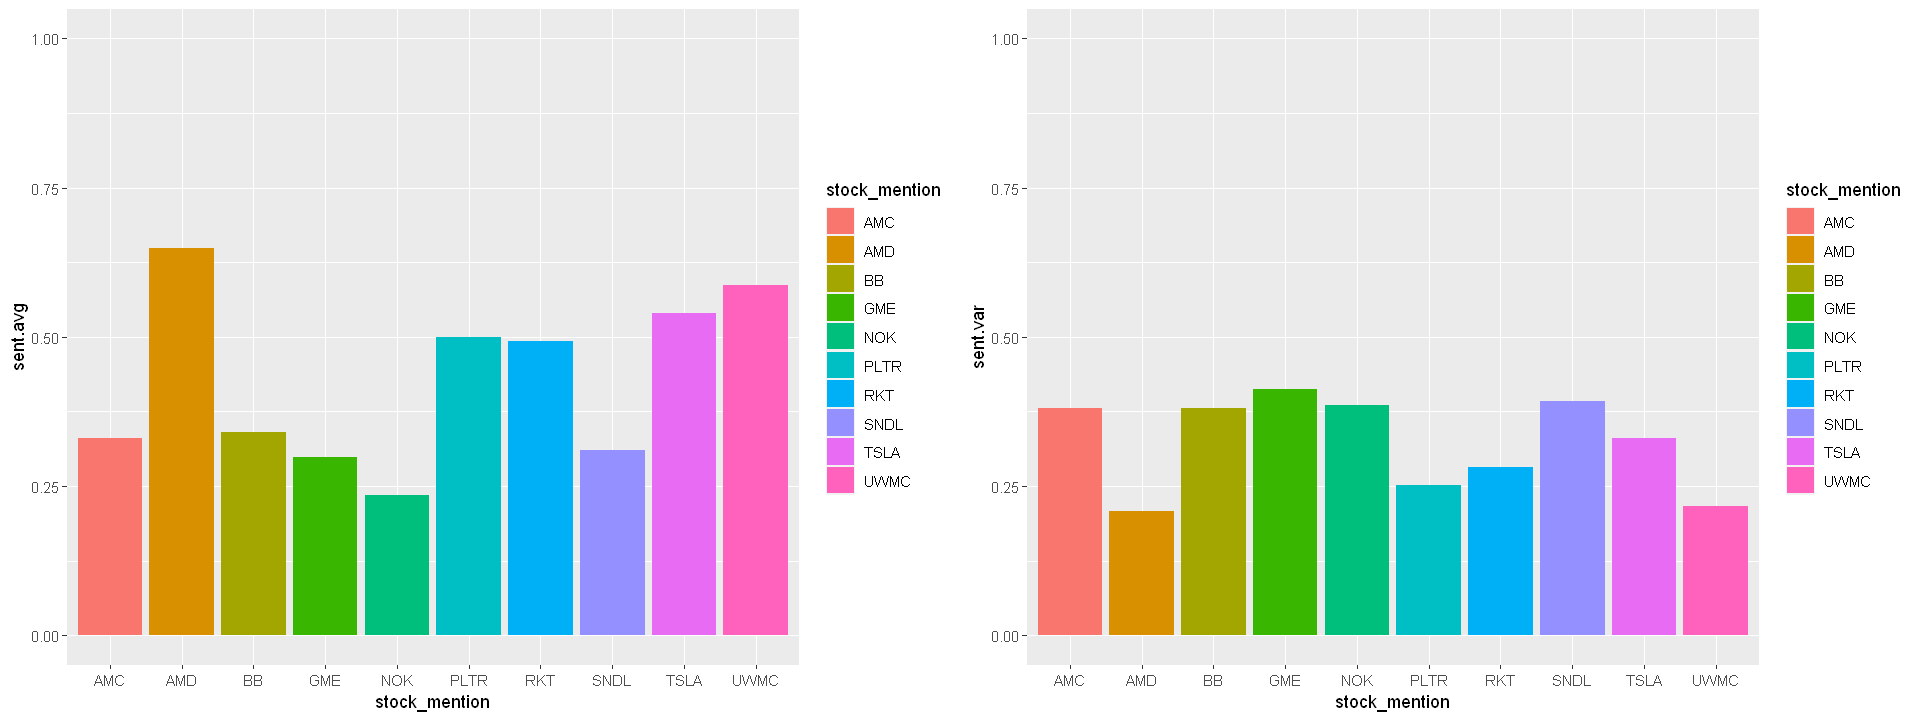

In [37]:
options(repr.plot.width = 16, repr.plot.height = 6)
plot1 <- ggplot(data = plot_df_b, aes(x = stock_mention)) + geom_col(aes(y = sent.avg, fill = stock_mention)) + coord_cartesian(ylim = c(0, 1))
plot2 <- ggplot(data = plot_df_b, aes(x = stock_mention)) + geom_col(aes(y = sent.var, fill = stock_mention)) + coord_cartesian(ylim = c(0, 1))

grid.arrange(plot1, plot2, ncol = 2)


In fact, the average sentiment score over the observed period is 0.5,with 75% of the observations haing positive sentiment. The distribution of the sentiment score over the observed period is heavily skwed towards the right, but we still have a significant portion of neutral sentiment scores. We'll deal with this later during feature engineering.

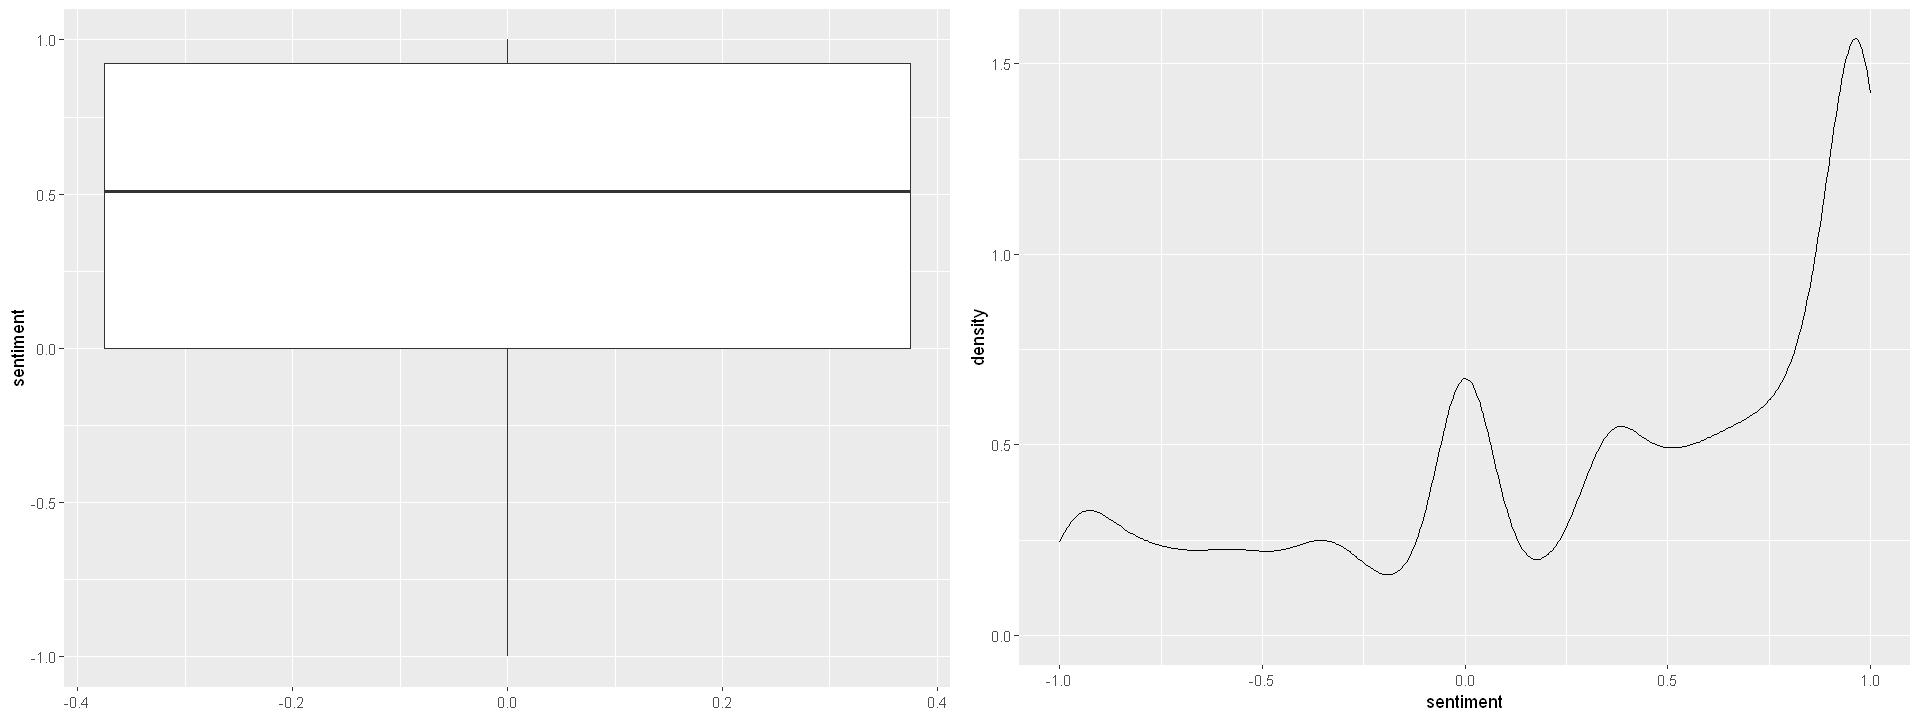

In [38]:
plot_3 <- ggplot(plot_df_a, aes(y= sentiment)) + geom_boxplot()
plot_4 <- ggplot(plot_df_a, aes(x= sentiment)) + geom_density()
grid.arrange(plot_3, plot_4, ncol = 2)
